## Introduction: 

** just a VERY rough draft - will edit this by saturday
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

- frank wood and his research team collected data about how ppl play video games through opening a minecradt server
- there were 2 datasets from this experiment: players dataset and sessions dataset (breifly explain both dataset)

clearly state the question you tried to answer with your project
- Broad question: "What 'kinds' of players are most likely to contribute a large amount of data to the dataset?".
 
- Specific research question:  "Can a player's age and gender be used to predict the amount of time they spend playing Minecraft in the 'players.csv' dataset".

identify and fully describe the dataset that was used to answer the question

- we will be using players dataset to answer our question
- explain dataset


 ## The Data 

(descibing data set and obervations/ variables)

consists of 196? observations
collects data of players experience, their subscriptions status, hashed email, played hours (per week), name, gender, and age
add summary stats below

## Methods for Analysis

Before undergoing any ananlysis on the loaded datasets, all of the necessary packages must be loaded into R. 

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("https://raw.githubusercontent.com/natlogan6/Dsci100-individual-/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


This dataset contains seven variables for 196 players. Although the data is already tidy, some variables are irrelevant to the research question. To ensure a clear and accurate analysis, only the columns for experience, subscription, played_hours, gender, and Age are included using the select function, as they contribute meaningful information about the types of players on the server, while name and hashedEmail do not.

The dataset was also further cleaned by removing entries where played_hours equals 0.0 and where age values are missing. Players with zero recorded hours likely did not engage meaningfully with the game, so including them could distort averages and reduce model accuracy. Likewise, missing age values hinder proper grouping and comparison. Removing these entries leads to cleaner visualizations and more reliable analysis.

In [4]:
player_filtered <- players |>
select (experience, subscribe, played_hours, gender, Age) |> 
filter (played_hours != 0.0) |> 
drop_na (Age, gender, played_hours) |>
mutate(gender = as_factor(gender)) |>
mutate(experience = as_factor (experience))

player_filtered

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,0.1,Female,44
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,2.3,Male,17


The dataset has now been refined to include only the information relevant to answering the question: “Which types of players are most likely to contribute large amounts of data?” Our analysis will therefore focus on identifying these player categories. A practical way to do this is by examining how various variables influence the played_hours variable, since players with the highest playtime generate the most data and should be prioritized for recruitment.

Before proceeding, however, it is important to address a key issue in the dataset: some players appear to have misreported their age. For example, the first data point lists an age of 9 years, which is clearly invalid, especially given that the server is restricted to members of our class. Including such anomalies would distort our understanding of the relationship between age group and playtime. To avoid this, we will consider only players aged 15–30 when examining age-related patterns.

In addition to age, we will analyze playtime in relation to experience level, gender, and subscription status. At this stage, bar graphs will be used to explore these relationships and to identify which variables are most relevant for the group project.

The first graph we produced shows experience level vs. mean hours played. Using the ggplot2 package, we grouped the data by experience level and calculated the average hours played. We then created a bar plot with geom_bar(stat = "identity"), placing experience on the x-axis and mean hours played on the y-axis.

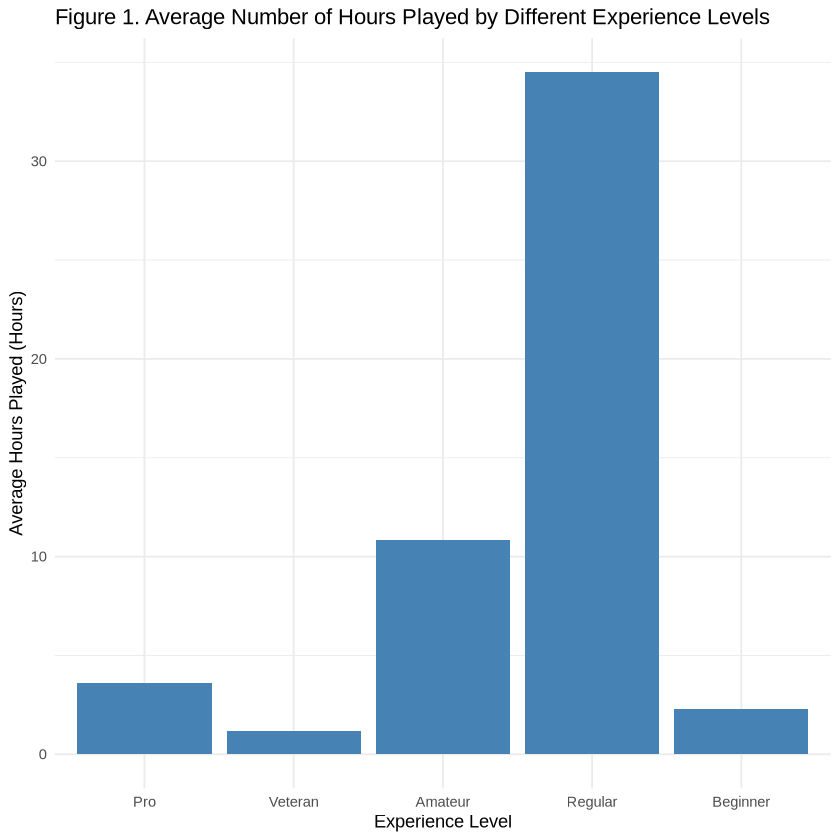

In [5]:
player_data_experience_mean <- player_filtered |>
group_by (experience) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE) )


ggplot (player_data_experience_mean, aes(x = experience, y = played_hours)) +
geom_bar (stat = "identity", fill = "steelblue") +
labs (title = "Figure 1. Average Number of Hours Played by Different Experience Levels",
x = "Experience Level",
y = "Average Hours Played (Hours)") +
theme_minimal()

The plot above helps determine that Amateur and Regular players demonstrate higher gameplay hours than average. 

The second plot generated plotted subscription status against hours played, with subscriptions on the x-axis and hours on the y-axis

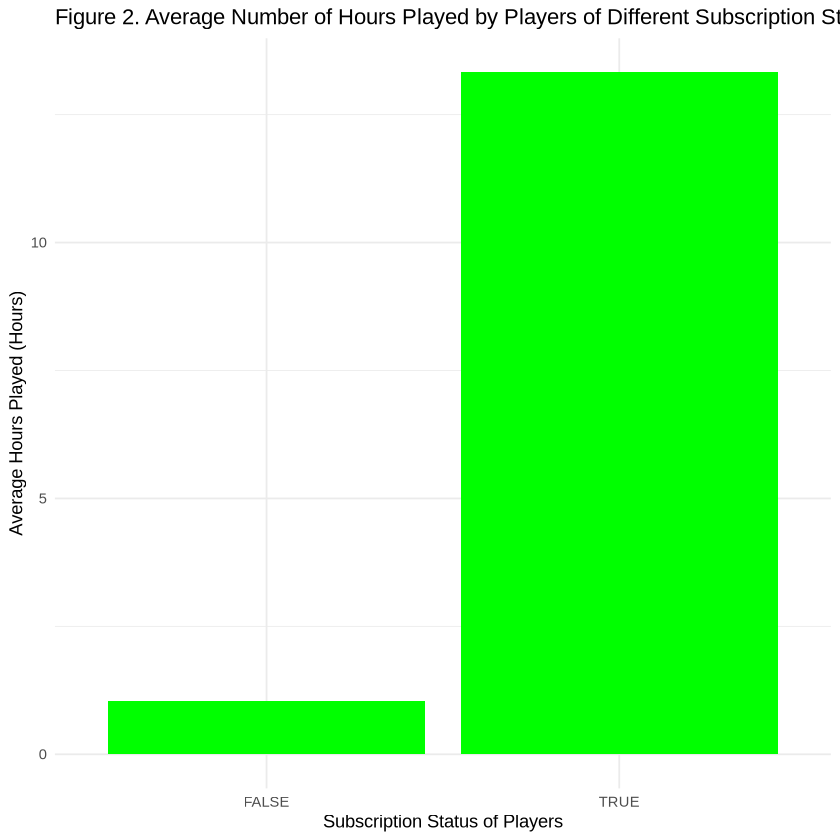

In [6]:
player_data_subscribe_mean <- player_filtered |>
group_by(subscribe) |>
summarise(played_hours = mean(played_hours, na.rm = TRUE))


ggplot(player_data_subscribe_mean, aes(x = subscribe, y = played_hours)) +
geom_bar (stat = "identity",
fill = "green") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Subscription Status",
x = "Subscription Status of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

options(repr.plot.width = 10, repr.plot.height = 8) 

The plot above demonstrates that subscribed players contribute considerably more to playtime hours than those who are not subscribed.

The third graph we generated plotted the gender identity of the players vs. the average playtime hours. Similarly to before, gender was plotted on the x-axis and hours played was plotted on the Y-axis. 

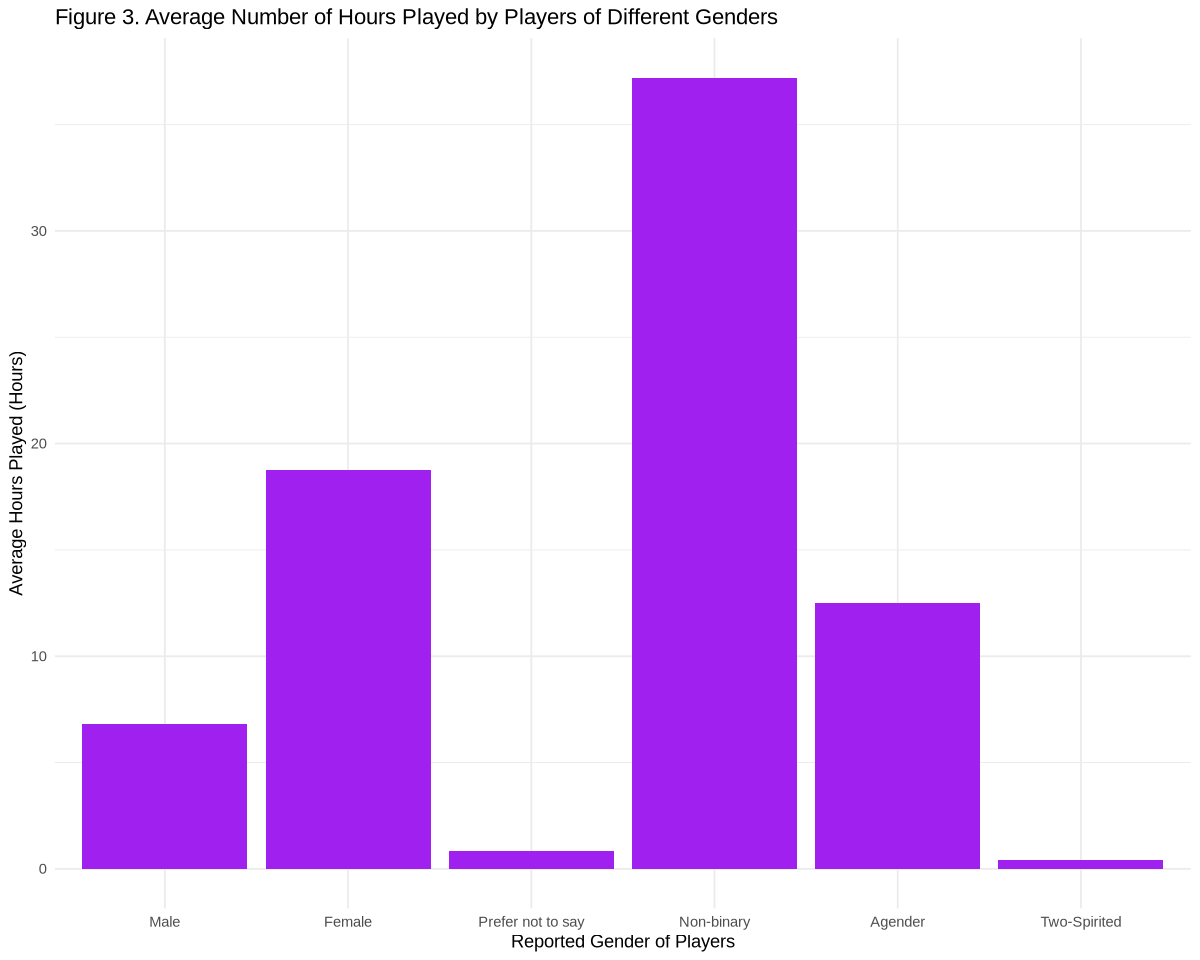

In [7]:
player_data_gender_mean <- player_filtered |> 
group_by (gender) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_gender_mean, aes (x = gender, y = played_hours) ) +
geom_bar(stat = "identity", fill = "purple") +
labs (title = "Figure 3. Average Number of Hours Played by Players of Different Genders",
x = "Reported Gender of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

The graph allows us to determine that non-binary people contribute the most to the dataset, followed by females, agender people, males. The contribution from the other genders was negligible

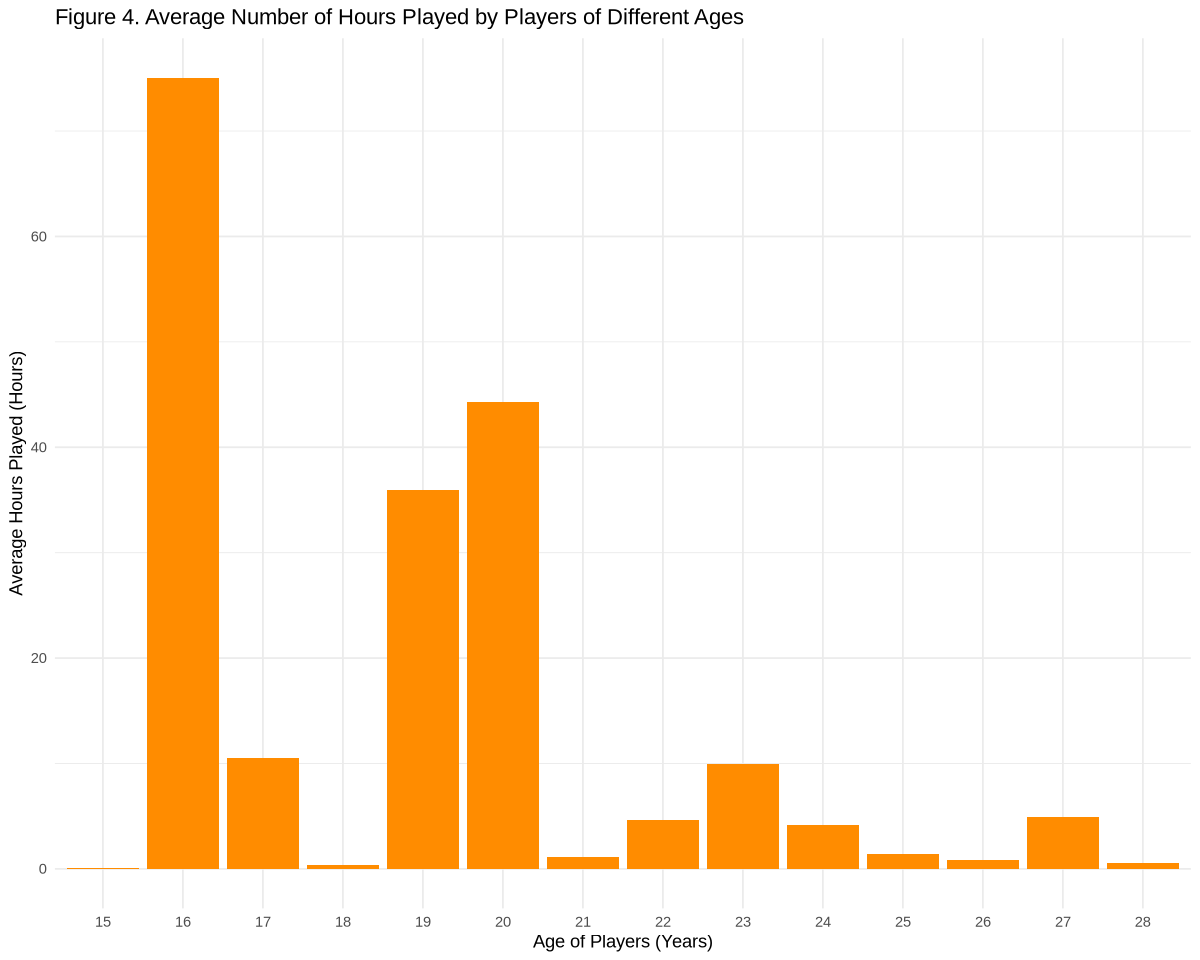

In [8]:
player_data_age_mean <- player_filtered |>
filter (Age >= 15 & Age <= 30) |> 
group_by (Age) |>
summarise (played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_age_mean, aes(x = factor(Age), y = played_hours)) +
geom_bar(stat = "identity", fill = "darkorange") +
labs (title = "Figure 4. Average Number of Hours Played by Players of Different Ages",
x = "Age of Players (Years)",
y = "Average Hours Played (Hours)") +
theme_minimal()

The final graph we produced plotted age vs. average hours played, with age on the x-axis and mean hours played on the y-axis, using the same procedure applied in the previous visualization.

Although these plots help reveal useful correlations among the variables, we supplemented them with further analyses to support more substantial conclusions. These included regression models designed to predict playtime based on factors such as gender and age.

## Results and Further Analysis

We first divide the filtered player dataset into a 75% training set and a 25% testing set using stratified sampling on played_hours to ensure both sets have similar playtime distributions. The training set is used to fit the models, and the testing set is used to assess their performance on unseen data. This approach helps us reliably identify which player demographics are associated with higher levels of data contribution.

In [9]:
players_split <- initial_split(player_filtered, prop = 0.75, strata = played_hours) 
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training
players_testing

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Amateur,TRUE,0.2,Male,22
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,2.7,Non-binary,21
Amateur,TRUE,32.0,Male,22
Amateur,FALSE,2.3,Male,17


experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Veteran,TRUE,1.6,Female,23
Regular,TRUE,0.3,Male,58
Veteran,FALSE,0.1,Male,18
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,2.1,Male,24
Pro,FALSE,0.2,Male,17
Regular,FALSE,0.1,Male,18


The code first divides the dataset into training (75%) and testing (25%) sets. Using (strata = played_hours) ensures that the distribution of played_hours remains similar in both sets. 

The following code fits a linear regression model that predicts the number of hours an individual plays based on their age.


In [10]:
players_recipe <- recipe(played_hours ~ Age, data = player_filtered) 

players_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
     26.933       -0.769  


The results indicate that predicted playtime decreases as age increases, suggesting a negative relationship between age and player engagement on the Minecraft server. 

Next, we use the trained model (players_fit) to generate predictions on the test set, merge these predictions with the observed values, and evaluate model performance by comparing predicted and actual played_hours.


In [11]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred)

players_test_results 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.381439e+01
rsq,standard,5.294874e-04
mae,standard,1.710503e+01


The $R^2$ (rsq) value from this model is approximately 0.14 which shows that age explains about 14% of the variation in the response played_hours, leaving 86% unexplained. Therefore age is not a strong predictor of play time. 

Now we will filter and create a tibble of the maximum and minimum age from the dataset. 

In [12]:
player_age_minimum <- player_filtered |>
    select(Age) |>
    min()

player_age_maximum <- player_filtered |>
    select(Age) |>
    max()

played_hours_prediction <- tibble(Age = c(player_age_minimum, player_age_maximum))

played_hours_prediction

Age
<dbl>
9
58


Next, we use the linear regression model to predict playtime (.pred) for the youngest and oldest players, and then visualize the results by plotting the observed data alongside a red regression line that represents the model’s predicted relationship between age and hours played.

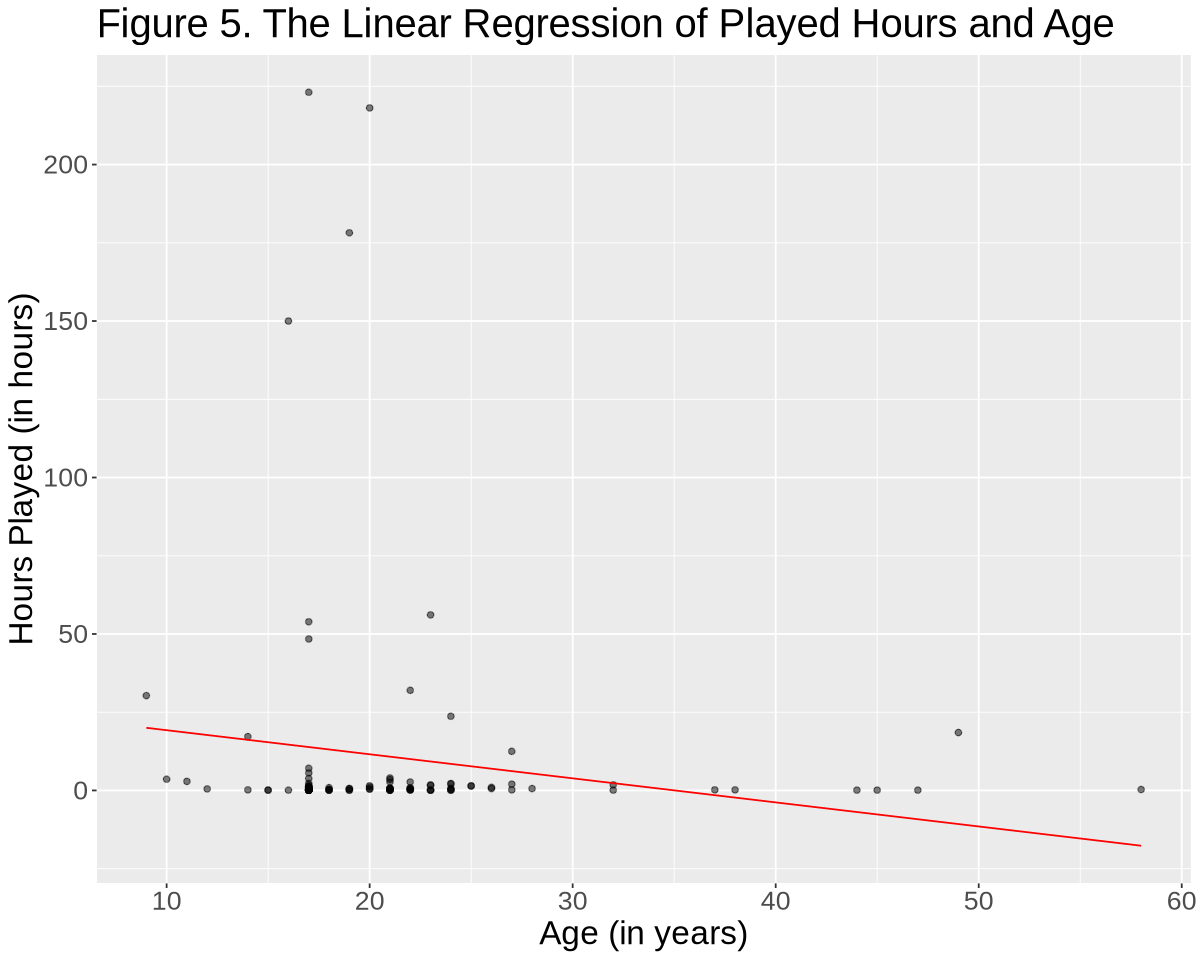

In [13]:
player_predictions <- predict(players_fit, played_hours_prediction) |>
    bind_cols(played_hours_prediction)

age_plot <- ggplot(player_filtered, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.5) +
    geom_line(data = player_predictions,
              mapping = aes(x = Age, y = .pred),
              color = "red") +
    xlab("Age (in years)") +
    ylab("Hours Played (in hours)") +
    ggtitle("Figure 5. The Linear Regression of Played Hours and Age") +
    theme(text = element_text(size = 20))
age_plot

The resulting plot shows a slight negative relationship between age and playtime, suggesting that older players tend to spend fewer hours playing. 

Next, following a similar approach, we will create and train a linear regression model to predict played_hours using **gender** in place of Age.


In [14]:
player_recipe <- recipe(played_hours ~ gender, data = players_training)

player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data = players_training)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)             genderFemale  genderPrefer not to say  
                  8.225                    4.298                   -7.550  
       genderNon-binary       genderTwo-Spirited  
                 47.300                   -7.825  


The linear regression model predicts played hours relative to male players, who are the baseline at 7.22 hours. Female players are predicted to play 14.60 more hours than males (21.81 hours total), non-binary players 47.89 more hours (55.10 hours total), agender players 5.29 more hours (12.50 hours total), and those who prefer not to disclose their gender 6.29 fewer hours (0.93 hours total).

Next, we will use the trained model to generate predicted playtime values for the testing set and merge these predictions with the actual testing data into a single table.

In [15]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_test_results

.pred,experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<lgl>,<dbl>,<fct>,<dbl>
9.247071,Veteran,TRUE,1.6,Female,23
-17.666261,Regular,TRUE,0.3,Male,58
13.091833,Veteran,FALSE,0.1,Male,18
⋮,⋮,⋮,⋮,⋮,⋮
8.478119,Amateur,FALSE,2.1,Male,24
13.860785,Pro,FALSE,0.2,Male,17
13.091833,Regular,FALSE,0.1,Male,18


Next, we will create a plot to show the actual and predicted playtime for each gender

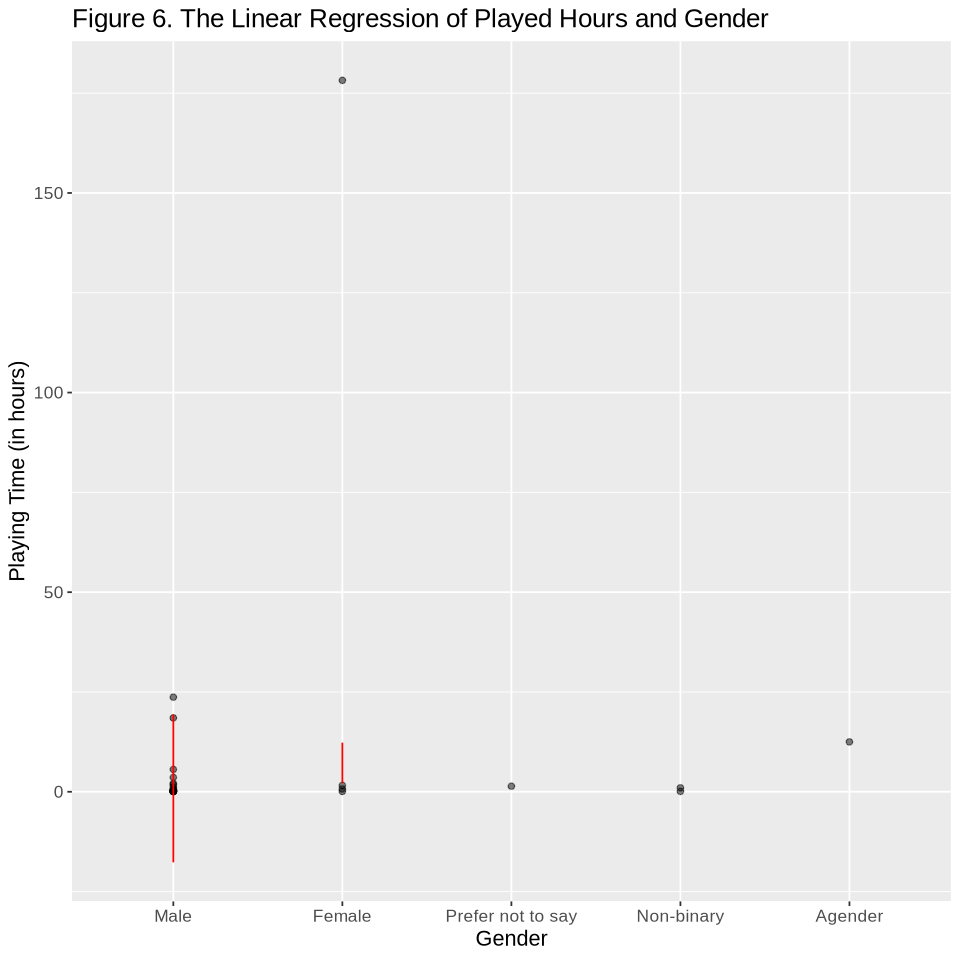

In [16]:
options(repr.plot.width = 8, repr.plot.heigh = 10)
gender_plot <- ggplot(players_test_results, aes(x = gender, y = played_hours)) +
    geom_point(alpha = 0.5)  +
    geom_line(aes(y=.pred), color = "red") + #line
    xlab("Gender") +
    ylab("Playing Time (in hours)") +
    ggtitle("Figure 6. The Linear Regression of Played Hours and Gender") +
    theme(text = element_text(size = 13))

gender_plot

Figure 6 shows the relationship between gender and total hours played. Most players across all gender categories report low playtimes (generally under 10 hours). The Male group displays a wider range, including several higher-playtime values and one extreme outlier around 150 hours. In contrast, the Female and Non-binary groups have consistently low playtimes with no major outliers.

Overall, the figure suggests ... HELP

maybe we could add a line like the graph above and see if there is a relationship - not really sure what the data for the prediction is
little to no relationship between gender and played hours?

I think you need to do regression on this one as you did for the age graph, but since the x-axis variable is categorical, we need to convert it to numerical values...(apparently called one-hot encoding, the TA mentioned it in feedback on my individual assignment) I'm not sure if we could use it becuase we never learned it (I think?), but I found a page about it: https://faculty.nps.edu/rbassett/_book/regression-with-categorical-variables.html
Also, it's probably better to use a box plot instead of a scatter, but again, we never learned it, so idek...


Call:
lm(formula = played_hours ~ gender, data = player_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.100  -6.724  -6.624  -4.724 216.276 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                6.824      4.320   1.580   0.1173  
genderFemale              11.914      9.237   1.290   0.2000  
genderPrefer not to say   -6.004     17.281  -0.347   0.7290  
genderNon-binary          30.376     15.873   1.914   0.0584 .
genderAgender              5.676     37.662   0.151   0.8805  
genderTwo-Spirited        -6.424     37.662  -0.171   0.8649  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.41 on 103 degrees of freedom
Multiple R-squared:  0.04813,	Adjusted R-squared:  0.001926 
F-statistic: 1.042 on 5 and 103 DF,  p-value: 0.3973


,2.5 %,97.5 %
(Intercept),-1.743983,15.39198
genderFemale,-6.405022,30.23321
genderPrefer not to say,-40.275931,28.26793
genderNon-binary,-1.104778,61.85678
genderAgender,-69.017941,80.36994
genderTwo-Spirited,-81.117941,68.26994


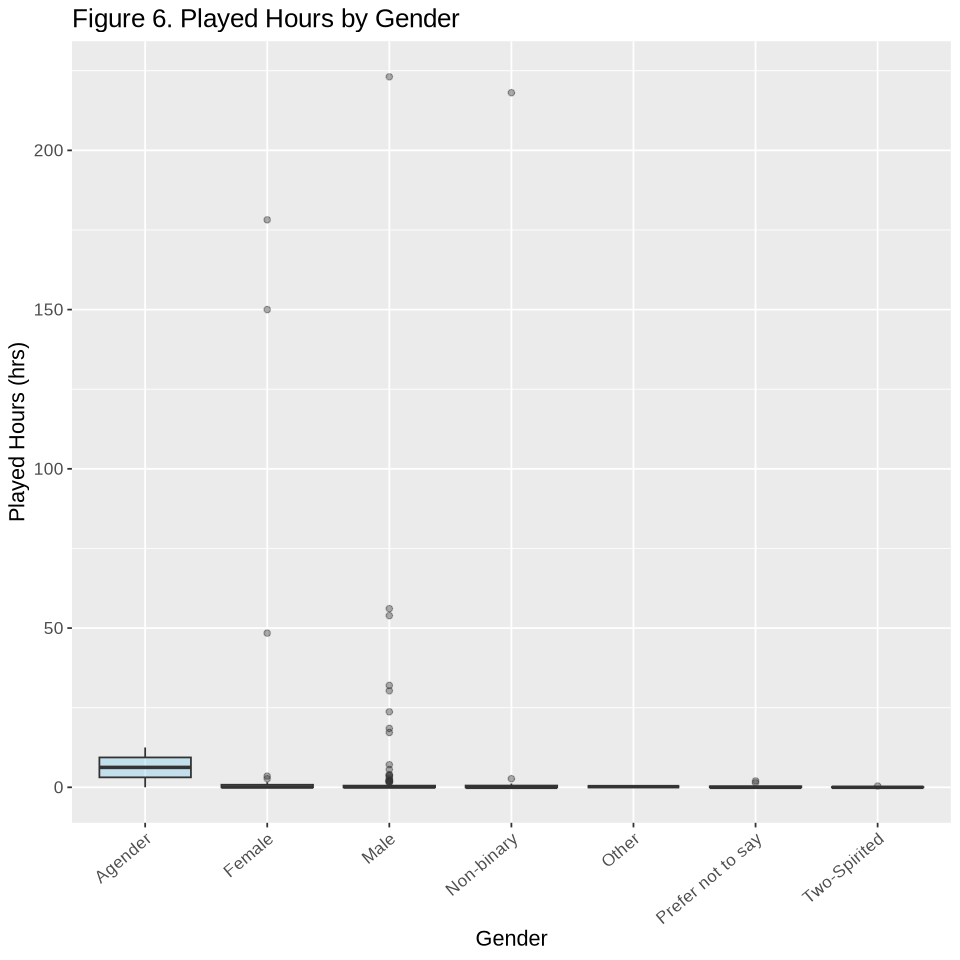

In [17]:
ggplot(players, aes(x = gender, y = played_hours)) +
    geom_boxplot(fill = "skyblue", alpha = 0.4) +
    theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
    ggtitle("Figure 6. Played Hours by Gender") +
    xlab("Gender") +
    ylab("Played Hours (hrs)") +
    theme(text = element_text(size = 13))
options(repr.plot.width = 8, repr.plot.height = 8)

lm.gender=lm(played_hours~gender, data = player_filtered)
summary(lm.gender)

confint(lm.gender, level=0.95)

- baseline cateogry is Agender (R takes it alphabetically so all the other genders are compared to Agender)
- coefficients from the confidence interval reveals that the data is not significant meaning the difference is most likely due to random variation
- no evidence that gender predicts played_hours (= inadequate predictor)

## Discussion

- summarize what you found
- discuss whether this is what you expected to find

Expectations:
Men contribute more data

Teens to young adults contribute more data
- discuss what impact could such findings have
- discuss what future questions could this lead to